### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 7938</pre>

In [1471]:
# student 1: Israel 7938
# student 2: Eran 6215
# student 3: Avihai 2474
# student 4: Almog 8269
# student 5: Liron 5068
# student 6: Matan 9999

## Part 2 - Experiments
You could add as many code cells as needed

In [1472]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [1473]:
train_set = pd.read_csv('titanic_train.csv')
test_set = pd.read_csv("titanic_test.csv")

In [1474]:
train_set.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [1475]:
test_set.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [1476]:
def showSurvivorsByGenderAndChildren():
    survivors = train_set[train_set['Survived'] == 1]

    #Men
    survived_man = survivors[(survivors['Sex'] == 1) & (survivors['Age'] > 18)]
    survived_man_count = len(survived_man)

    #Women
    survived_women = survivors[(survivors['Sex'] == 0) & (survivors['Age'] > 18)]
    survived_women_count = len(survived_women)

    #Kids
    survived_kids = survivors[survivors['Age'] <= 18]
    survived_kids_count = len(survived_kids)

    survived_count = len(survivors)

    return [survived_man_count, survived_women_count, survived_kids_count, survived_count]

In [1477]:
display(train_set.isnull().sum())
print("No missing values in train set")

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

No missing values in train set


## Visualization

In [1478]:
# Creating a dataframe for the pie plot using the given parameters
def create_pie_table(population):
    data = {'Category': ['Male', 'Female', 'Kids', 'Total'],
            'Survived': population}

    survivors_df = pd.DataFrame(data)
    survived_count = population[-1]  #get last item

    survivors_df['Percentage'] = survivors_df['Survived'].apply(lambda x: round((x / survived_count) * 100, 1))
    return survivors_df


def show_pie_survived(population_counts):
    labels = ['Male', 'Female', 'Kids']
    colors = ['#E91694', '#94E916', '#1694E9']
    fig, ax = plt.subplots(figsize=(18, 10))
    ax.pie(population_counts, labels=labels, autopct='%1.1f%%', colors=colors, textprops={'fontsize': 20})
    plt.title('Survivors of the Titanic', fontsize=20)
    fig.patch.set_facecolor('white')
    plt.show()

,Category,Survived,Percentage
0,Male,69,24.6
1,Female,156,55.5
2,Kids,56,19.9
3,Total,281,100.0


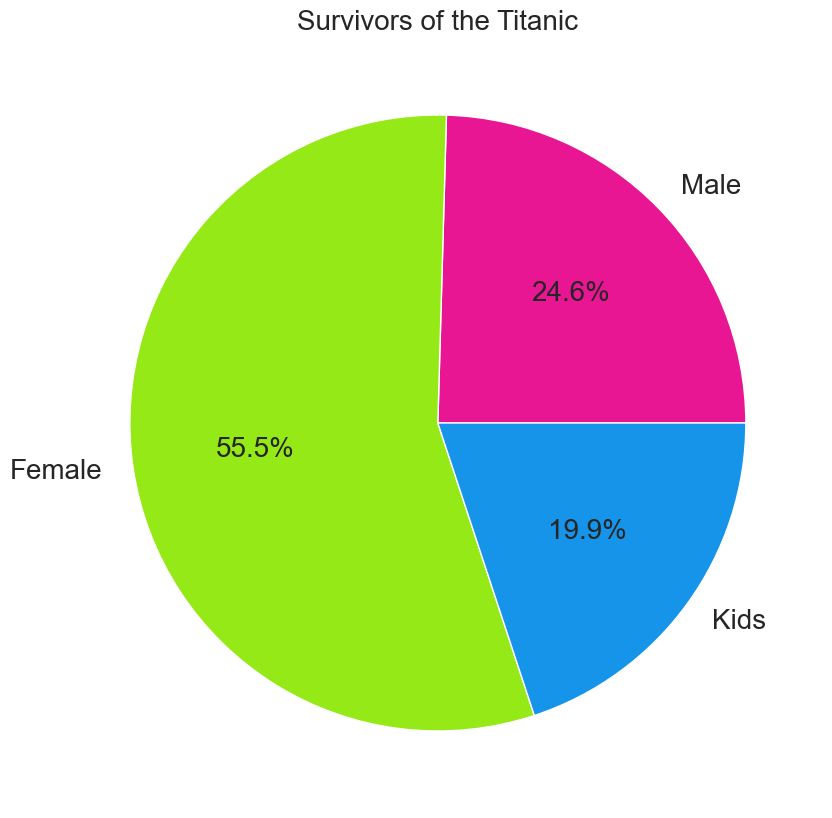

In [1479]:
population = showSurvivorsByGenderAndChildren()

# Creating a data table for the pie plot
survived_percentage_df = create_pie_table(population)
display(survived_percentage_df)

population.pop()  #remove last item - total count
show_pie_survived(population)

In [1480]:
def plot_hist_gender_survivors():
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    
    genders = {'Female': 0, 'Male': 1}
    colors = {'survived': ["#76FF00", "#FF5100"], 'not_survived': ["#8900FF", "#00AEFF"]}
    
    #loop through the combinations of gender and survived status
    for ax, (title, sex) in zip(axes, genders.items()):
        for status, color in colors.items():
            ages = train_set[(train_set['Sex'] == sex) & (train_set['Survived'] == (status == 'survived'))].Age
            sns.histplot(ages, bins=10, label=status, ax=ax, kde=False, color=color[sex])
        
        ax.legend()
        ax.set_title(title)
    
    plt.show()

In [1481]:
# Making DataFrame for the histogram above with age group
def createHistTableAG(data_frame):
    age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
    age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

    data_frame = data_frame.copy()
    data_frame['AgeGroup'] = pd.cut(data_frame['Age'], bins=age_bins, labels=age_labels, right=False)

    data = {
        'AgeGroup': age_labels,
        'Survived Women': [],
        'Not Survived Women': [],
        'Survived Men': [],
        'Not Survived Men': []
    }

    for age_group in age_labels:
        survived_women = len(data_frame[(data_frame['AgeGroup'] == age_group) & (data_frame['Sex'] == 0) & (
                data_frame['Survived'] == 1)])
        not_survived_women = len(data_frame[(data_frame['AgeGroup'] == age_group) & (data_frame['Sex'] == 0) & (
                data_frame['Survived'] == 0)])
        survived_men = len(data_frame[(data_frame['AgeGroup'] == age_group) & (data_frame['Sex'] == 1) & (
                data_frame['Survived'] == 1)])
        not_survived_men = len(data_frame[(data_frame['AgeGroup'] == age_group) & (data_frame['Sex'] == 1) & (
                data_frame['Survived'] == 0)])

        data['Survived Women'].append(survived_women)
        data['Not Survived Women'].append(not_survived_women)
        data['Survived Men'].append(survived_men)
        data['Not Survived Men'].append(not_survived_men)

    survivors_by_age = pd.DataFrame(data)

    return survivors_by_age

,AgeGroup,Survived Women,Not Survived Women,Survived Men,Not Survived Men
0,0-10,16,9,15,12
1,11-20,28,8,5,44
2,21-30,75,28,33,180
3,31-40,44,7,19,59
4,41-50,18,9,9,35
5,51-60,9,2,4,23
6,61-70,3,0,2,10
7,71-80,0,0,0,5


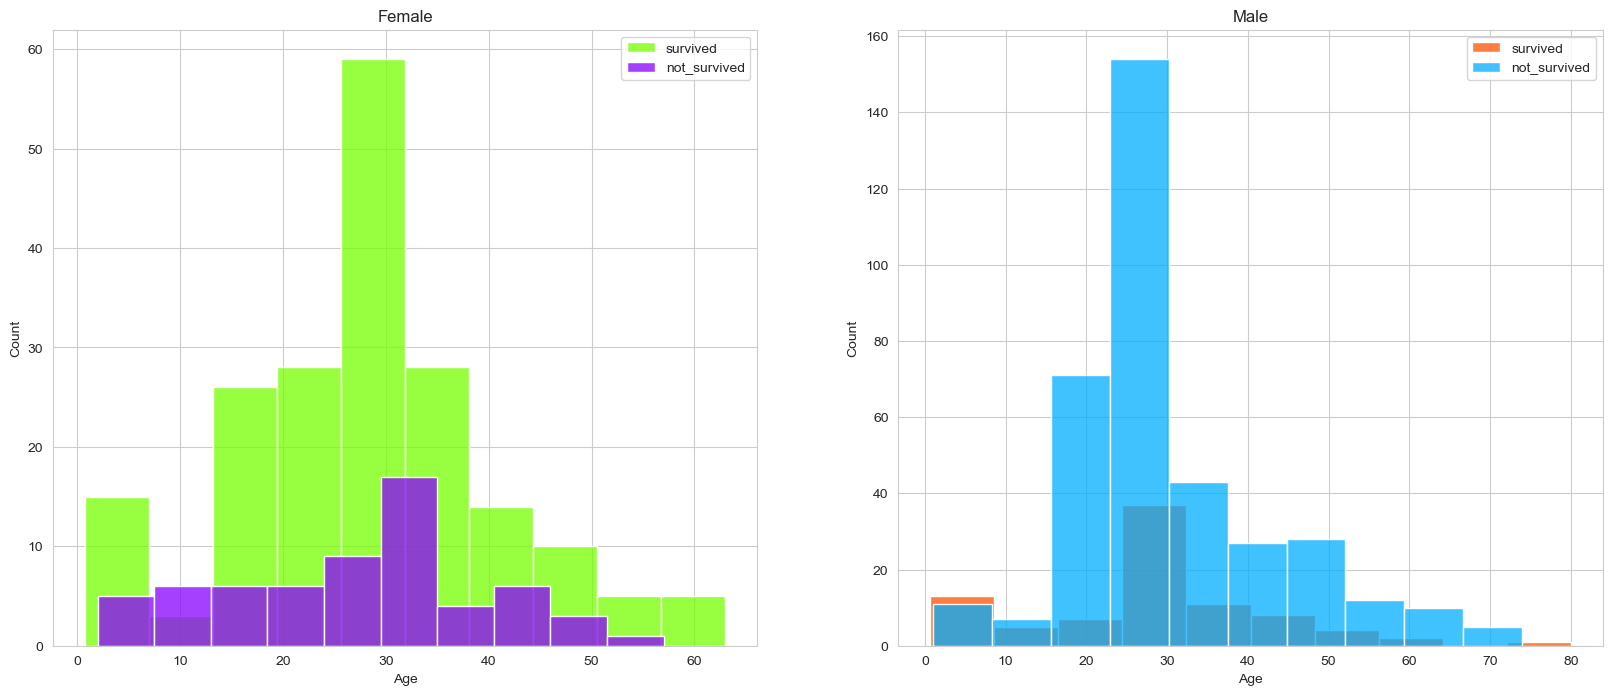

In [1482]:
#Creating a data table for the histogram with age group
histTableAges = createHistTableAG(train_set)
display(histTableAges)

plot_hist_gender_survivors()

# Feature engineering

### Find Outliers

#### let's check for Age outliers (using boxplot)

<Axes: ylabel='Fare'>

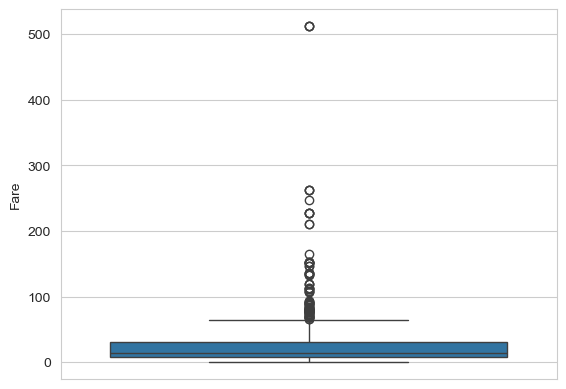

In [1483]:
# Fare outliers
sns.boxplot(train_set.Fare)

In [1484]:
train_set["Fare"].median()

14.5

In [1485]:
train_set["Fare"].describe()

count    712.000000
mean      32.379429
std       49.836074
min        0.000000
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [1486]:
# Find Fare outliers:

# "minimum" = Q1 - 1.5 * IQR
# "maximum" = Q3 + 1.5 * IQR
def outliersByIQR(col_name):
    Q1 = np.percentile(train_set[col_name], 25)
    Q3 = np.percentile(train_set[col_name], 75)
    IQR = Q3 - Q1

    Fare_Outliers = train_set[(train_set[col_name] < Q1 - 1.5 * IQR) | (train_set[col_name] > Q3 + 1.5 * IQR)].index
    print(f'Sum of Age_outliers: {len(Fare_Outliers)}')
    
# remove outliers by column name
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

<Axes: ylabel='Age'>

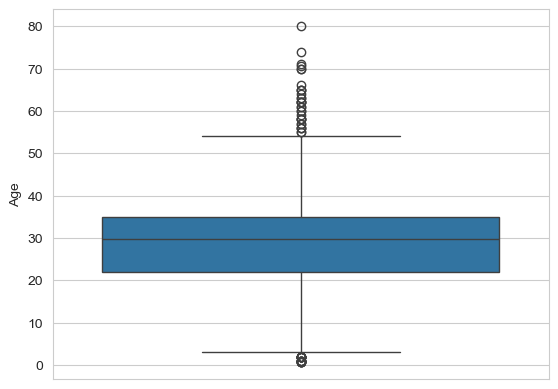

In [1487]:
# check outliers for Age
sns.boxplot(train_set.Age)

In [1488]:
train_set["Age"].median()
train_set["Age"].describe()

count    712.000000
mean      29.531213
std       13.188028
min        0.670000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [1489]:
train_set["Fare"].median()
train_set["Fare"].describe()

count    712.000000
mean      32.379429
std       49.836074
min        0.000000
25%        7.925000
50%       14.500000
75%       31.275000
max      512.329200
Name: Fare, dtype: float64

In [1490]:
# Find Age outliers:
outliersByIQR("Age")
outliersByIQR("Fare")

Sum of Age_outliers: 54
Sum of Age_outliers: 93


In [1491]:
#save the dataframe with the removed data
updated_df = remove_outlier(train_set, "Age")
print(updated_df.count())

Pclass      658
Sex         658
Age         658
SibSp       658
Parch       658
Fare        658
Embarked    658
Survived    658
dtype: int64


In [1492]:
#save the dataframe with the removed data
train_set = remove_outlier(train_set, "Fare")
print(train_set.count())

Pclass      619
Sex         619
Age         619
SibSp       619
Parch       619
Fare        619
Embarked    619
Survived    619
dtype: int64


#### For Numeric values:
#### Descriptive statistics: min, max, percentile, mean, std etc for numeric values:

### Check for missing Data - and fill when needed

In [1493]:
# Let's start by finding the missing values
def check_missing_data(df):
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0]  # Only show columns with missing data
    return missing_data

def fix_missing_values(data_frame):
    fill_strategies = {
        'Pclass': data_frame['Pclass'].mode()[0],
        'Sex': data_frame['Sex'].mode()[0],
        'Age': data_frame['Age'].mean(),
        'SibSp': data_frame['SibSp'].mode()[0],
        'Parch': data_frame['Parch'].mode()[0],
        'Fare': data_frame['Fare'].median(),
        'Embarked': data_frame['Embarked'].mode()[0],
        'Survived': data_frame['Survived'].mode()[0]
    }
    
    for column, fill_value in fill_strategies.items():
        if column in data_frame.columns:
            data_frame[column].fillna(fill_value, inplace=True)
    
    return data_frame

In [1494]:
missing_data = check_missing_data(train_set)
# print("Missing data",missing_data)

if len(missing_data) > 0:
    fix_missing_values(train_set)
    # check_missing_data(train_set)
    print(f"Filled missing data ({missing_data})")
else:
    print("No missing data")

No missing data


In [1495]:
# Use the NumPy percentile() method to find the percentiles
def agePercentile(dataFrame):
    x_age = np.percentile(dataFrame["Age"], 75)
    y_age = np.percentile(dataFrame["Age"], 90)

    print(f'x_age meaning that 75% of the people on the Titanic are {x_age} years old')
    print(f'y_age meaning that 90% of the people on the Titanic are {y_age} years old')

In [1496]:
agePercentile(train_set)

x_age meaning that 75% of the people on the Titanic are 34.0 years old
y_age meaning that 90% of the people on the Titanic are 46.200000000000045 years old


#### Feature engineering for Naive Bayes:

In [1497]:
#defining a training function to NB algorithm:
def nb_train(train_set):
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
    x_train = train_set[features]
    y_train = train_set['Survived']
    return x_train, y_train

In [1498]:
def nb_test(x_train, y_train):
    nb = GaussianNB()
    training_sizes = np.linspace(0.1, 0.9, 9)
    accuracies = []
    for size in training_sizes:
        x_train_split, x_val_split, y_train_split, y_val_split =\
            train_test_split(x_train, y_train, train_size=size,random_state=42)
        
        nb.fit(x_train_split, y_train_split)
        val_predictions = nb.predict(x_val_split)
        accuracy = accuracy_score(y_val_split, val_predictions)
        accuracies.append(accuracy)
    max_accuracy = max(accuracies)
    max_index = accuracies.index(max_accuracy)  #choosing the highest accuracy value from all accuracies

    return training_sizes, accuracies, max_accuracy, max_index

In [1499]:
def show_accuracies_nb(training_sizes, accuracies, max_accuracy, max_index):
    plt.figure(figsize=(10, 6))
    plt.plot(training_sizes, accuracies, marker='o', linestyle='-', color='b')
    plt.annotate(
        f'Max accuracy: {max_accuracy:.3f}',
        xy=(training_sizes[max_index], accuracies[max_index]),
        xytext=(training_sizes[max_index] + 0.1, accuracies[max_index] - 0.050),
        arrowprops=dict(facecolor='orange', shrink=0.05),
        fontsize=15,
        color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
    )

    plt.xlabel('Training Size', fontsize=20)
    plt.ylabel('Accuracy', fontsize=20)
    plt.title('Validation Accuracy of Naive Bayes Classifier', fontsize=20)
    plt.grid(True)
    print(f"Max accuracy for Naive Bayes algorithm: {max_accuracy:.3f}")
    plt.show()


In [1500]:
#feature engineering by PCA and scaling (pipelining):
def create_pipeline_nb(train_set, scaler, pca, dim):
    x_train = train_set[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
    steps = []
    if scaler:
        steps.append(('scaler', StandardScaler()))
    if pca:
        steps.append(('pca', PCA(n_components=dim)))

    pipeline = Pipeline(steps)
    fe_train = pipeline.fit_transform(x_train)
    return fe_train

   Scaler    PCA  Best Dim  Max Accuracy
0    True   True         4      0.811828
1    True  False         1      0.796774
2   False   True         5      0.822581
Max accuracy for Naive Bayes algorithm: 0.823


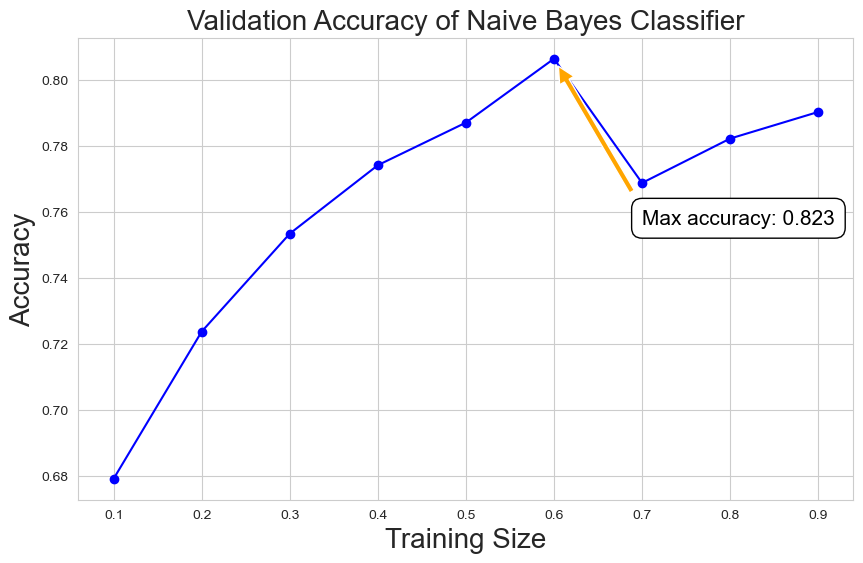

In [1501]:
# Define the combinations of parameters and the range of `dim` values
def best_feature_engineering():
    combinations = [
        (True, True),
        (True, False),
        (False, True)
    ]
    dim_values = range(1, len(train_set.columns) - 1)  # Assuming we want to test dimensions from 1 to col len - 1 

    # Initialize a list to store the results
    results = []
    training_sizes = None #TODO check default assignment
    accuracies = []
    max_index = 0
    y_train = train_set['Survived']
    # Iterate over each combination and each dim value
    for scaler, pca in combinations:
        best_accuracy = 0
        best_dim = None
        for dim in dim_values:
            fe_train = create_pipeline_nb(train_set, scaler, pca, dim)
            training_sizes, accuracies, max_accuracy, max_index = nb_test(fe_train, y_train)

            if max_accuracy > best_accuracy:
                best_accuracy = max_accuracy
                best_dim = dim

        results.append({
            'Scaler': scaler,
            'PCA': pca,
            'Best Dim': best_dim,
            'Max Accuracy': best_accuracy
        })

    # Create a DataFrame to display the results
    results_df = pd.DataFrame(results)
    return training_sizes, accuracies, max_index, results_df


training_sizes, accuracies, max_index_nb, results_nb_df = best_feature_engineering()

# Display the results table
print(results_nb_df)
best_accuracy = results_nb_df['Max Accuracy'].max()
show_accuracies_nb(training_sizes, accuracies, best_accuracy, max_index_nb)

## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

## KNN training:

In [1502]:
def train_KNN(df):
    x_train = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
    y_train = df['Survived']
    knn = KNeighborsClassifier(n_neighbors=11)
    knn.fit(x_train, y_train)
    return knn

knn_trained = train_KNN(train_set)

# Naive Bayes training:

In [1503]:
#call the training function to NB algorithm:
x_train_nb, y_train_nb = nb_train(train_set)
display(x_train_nb)

#TODO use the best Feature engineering from the result of the function above

,Pclass,Sex,Age,SibSp,Parch,Fare
1,2,0,45.000000,0,0,13.5000
2,3,1,20.000000,0,0,9.5000
3,3,1,36.000000,0,0,7.8958
4,3,1,22.000000,0,0,8.0500
5,3,1,29.699118,0,0,7.2500
...,...,...,...,...,...,...
706,3,1,29.699118,0,0,7.8958
707,1,1,54.000000,0,0,51.8625
708,3,1,14.000000,5,2,46.9000
709,2,0,6.000000,0,1,33.0000


## Part 4 - Apply on test and show model performance estimation

## KNN algorithm testing:

In [1504]:
test_set = pd.read_csv("titanic_test.csv")

In [1505]:
x_test_knn = test_set[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y_test_knn = test_set['Survived']

In [1506]:
y_predict_knn = knn_trained.predict(x_test_knn)
accuracy = accuracy_score(y_test_knn, y_predict_knn)
print("accuracy: ", accuracy)

accuracy:  0.7150837988826816


In [1507]:
def knn_test():
    global neighbors, accuracy_scores, accuracy
    neighbors = np.arange(1, 100)
    accuracy_scores = []
    for n in neighbors:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(x_train_nb, y_train_nb)
        y_pred = knn.predict(x_test_knn)
        accuracy = accuracy_score(y_test_knn, y_pred)
        accuracy_scores.append(accuracy)


knn_test()

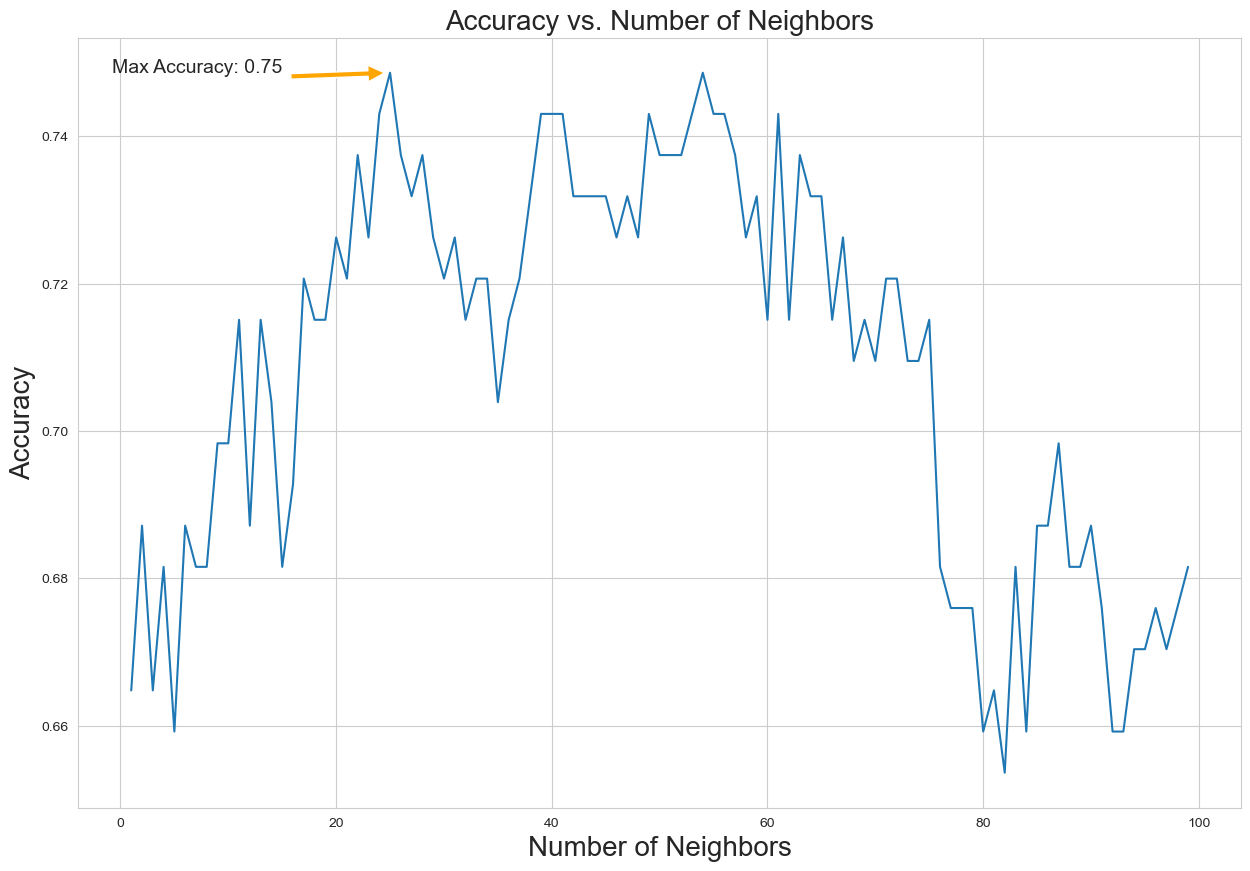

In [1508]:
def plot_knn_test():
    global max_index
    plt.figure(figsize=(15, 10))
    plt.plot(neighbors, accuracy_scores)
    plt.xlabel('Number of Neighbors', fontsize=20)
    plt.ylabel('Accuracy', fontsize=20)
    plt.title('Accuracy vs. Number of Neighbors', fontsize=20)
    # Finding the maximum accuracy and its corresponding neighbor
    max_index = accuracy_scores.index(max(accuracy_scores))
    max_neighbor = neighbors[max_index]
    max_accuracy = accuracy_scores[max_index]
    # Adding annotation
    plt.annotate(f'Max Accuracy: {max_accuracy:.2f}',
                 xy=(max_neighbor, max_accuracy),  # Arrowhead position
                 xytext=(max_neighbor - 10, max_accuracy),  # Text position above the point
                 arrowprops=dict(facecolor='orange', shrink=0.05),
                 ha='right', fontsize=14)
    plt.show()


plot_knn_test()

## Naive Bayes algorithm testing: